## Setup

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

%matplotlib inline

## Preprocessing

In [3]:
img = cv2.imread("res.jpg")
print(img.shape)

cv2.imshow('image', img)  
cv2.waitKey(0)
cv2.destroyAllWindows()

(532, 1024, 3)


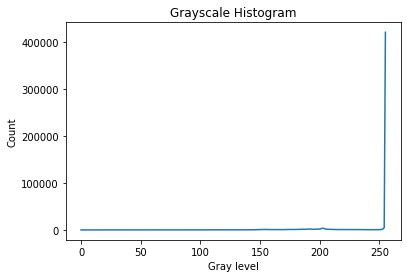

True

In [11]:
# Grayscale
gray = cv2.imread("res.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('gray', gray)  
cv2.waitKey(0)
cv2.destroyAllWindows()


# Plot histogram
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist) 
plt.title("Grayscale Histogram")
plt.xlabel("Gray level")
plt.ylabel("Count")
plt.show()


# Binarize image by thresholding
threshold = 250
bin_img = gray.copy()
bin_img[bin_img < threshold] = 0
bin_img[bin_img >= threshold] = 255

cv2.imshow('bin_img', bin_img)  
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('bin_img.jpeg', bin_img)

In [12]:
# Mask
kernel = np.ones((5,5), np.uint8) 
mask = cv2.erode(bin_img, kernel, iterations=3) 


cv2.imshow('mask', mask) 
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('mask.jpeg', mask)

True

In [20]:
height, width = mask.shape
print(mask[0][0])


def findResistorMeat(mask):
    min_region_size = 100
    black_flag = False
    result = []
    
    # Find top left and right corners
    for i in range(height):
        start = (0,0)
        stop = (0,0)
        black_count = 0

        for j in range(width):
            pixel = mask[i][j]
            
            # Transition from white to black
            if(!black_flag and pixel == 0):
                
                # Check if hit second black region
                if(stop !=(0,0)):
                    break
                
                start = (i,j)
                black_flag = True

            if(black_flag):
                black_count += 1
            
            # Transition from black to white
            if(black_flag and pixel == 255):
                stop = (i,j)
                black_flag = False

        if(black_count >= min_region_size):
            result.append(start)
            result.append(stop)
    
    
    # Find bottom midpoint
        

255


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Color Identification

In [6]:
copy = img
sliceValue = 110

copy = copy[sliceValue: sliceValue+100, 271:350,:]

cv2.imshow('copy', copy)  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Color helper functions
colors = {'red': (255,0,0),
          
          'green': (0,255,0),
          #'green': (68,181,32),
          #'green': (149,213,128),
          
          'blue': (0,0,255),
          'blue': (59,134,180),
          #'blue': (26,86,141),
                    
          'yellow': (255,255,0),
          
          'orange': (255,127,0),
          'orange': (249,110,11),
          
          'white': (255,255,255),
          'black': (0,0,0),
          
          #'gray': (127,127,127),
          #'pink': (255,127,127),
          #'purple': (127,0,255),
          
          'beige': (233,196,141),
          'beige': (215,171,117),
          
          #'gold': (217,160,91),
          #'gold': (189,125,62),
         }

def distance(left, right):
    return sum((l-r)**2 for l, r in zip(left, right))**0.5

class NearestColorKey(object):
    def __init__(self, goal):
        self.goal = goal
    def __call__(self, item):
        return distance(self.goal, item[1])

def avgPixel(array):
    temp = (0,0,0)
    for p in array:
        temp += p
    
    result = temp // len(array)
    return result


In [8]:
# Test color helpers
result = min(colors.items(), key=NearestColorKey((10,10,100)))
print(result)

result = min(colors.items(), key=NearestColorKey(img[150][10]))
print(result)


('black', (0, 0, 0))
('white', (255, 255, 255))


In [10]:
# Color identification
h = 110

line = img[h]
print(line.shape)

#print(line)

foundColorsSet = set()
foundColorsArray = []


i = 0
batchSize = 1
regionSize = 10
startFlag = False
increment = 1

while(i + regionSize < len(line)):
    #print(line[i])
        
    # Moving average
    #pixels = line[i : i+batchSize]
    #pixel = avgPixel(pixels)
    
    # Get current pixel color
    pixel = line[i]
    color = min(colors.items(), key=NearestColorKey(pixel))
    color = color[0]
    
    # Check consistent color sequence of region size
    for x in range(i, i + regionSize):
        pixel = line[x]
        c = min(colors.items(), key=NearestColorKey(pixel))
        c = c[0]
        
        if(color != c):
            color = None
            break
    
    print(i, color)
    
    # If inconsistent color, then move on
    if(color is None):
        i += increment
        continue
        
    #print(color)
    
    if(color == 'beige'):
        startFlag = True
    
    #change: if hit beige, reset color set since we can hit same color band
    
    if(startFlag and color != 'white' and color != 'beige'):
        if(color not in foundColorsSet):
            foundColorsSet.add(color)
            foundColorsArray.append(color)
    i += increment


print("Colors found: ", foundColorsArray)



(1024, 3)
0 white
white
1 white
white
2 white
white
3 white
white
4 white
white
5 white
white
6 white
white
7 white
white
8 white
white
9 white
white
10 white
white
11 white
white
12 white
white
13 white
white
14 white
white
15 white
white
16 white
white
17 white
white
18 white
white
19 white
white
20 white
white
21 white
white
22 white
white
23 white
white
24 white
white
25 white
white
26 white
white
27 white
white
28 white
white
29 white
white
30 white
white
31 white
white
32 white
white
33 white
white
34 white
white
35 white
white
36 white
white
37 white
white
38 white
white
39 white
white
40 white
white
41 white
white
42 white
white
43 white
white
44 white
white
45 white
white
46 white
white
47 white
white
48 white
white
49 white
white
50 white
white
51 white
white
52 white
white
53 white
white
54 white
white
55 white
white
56 white
white
57 white
white
58 white
white
59 white
white
60 white
white
61 white
white
62 white
white
63 white
white
64 white
white
65 white
white
66 white
w

594 blue
blue
595 blue
blue
596 blue
blue
597 blue
blue
598 blue
blue
599 None
600 None
601 None
602 None
603 None
604 None
605 None
606 None
607 None
608 None
609 None
610 blue
blue
611 blue
blue
612 blue
blue
613 blue
blue
614 blue
blue
615 blue
blue
616 blue
blue
617 blue
blue
618 blue
blue
619 None
620 None
621 None
622 None
623 None
624 None
625 None
626 None
627 None
628 None
629 None
630 None
631 None
632 None
633 None
634 None
635 None
636 None
637 None
638 None
639 None
640 None
641 None
642 None
643 None
644 white
white
645 white
white
646 white
white
647 white
white
648 white
white
649 white
white
650 white
white
651 white
white
652 white
white
653 white
white
654 white
white
655 white
white
656 white
white
657 white
white
658 white
white
659 white
white
660 white
white
661 None
662 None
663 None
664 None
665 None
666 None
667 None
668 None
669 None
670 None
671 None
672 None
673 None
674 None
675 None
676 None
677 None
678 white
white
679 white
white
680 white
white
681 whi

## Calculate Resistance

In [11]:
colorValues = {
    'black': 0,
    'brown': 1,
    'red': 2,
    'orange': 3,
    'yellow': 4,
    'green': 5,
    'blue': 6,
    'purple': 7,
    'gray': 8,
    'white': 9
}

print(foundColorsArray)

values = [colorValues[c] for c in foundColorsArray]
print(values)

['green', 'orange', 'blue']
[5, 3, 6]


In [12]:
resistance = 0
values = [colorValues[c] for c in foundColorsArray]

numBands = len(foundColorsArray)

if(numBands == 3):    
    resistance = (values[0]*10 + values[1]) * (10 ** values[2])
    print(resistance)

    
    

53000000
